In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

clothes_df = pd.read_csv('./clothes_size.csv')
print(clothes_df.head(6))
print(clothes_df.tail(6))

   weight   age  height size
0      62  28.0  172.72   XL
1      59  36.0  167.64    L
2      61  34.0  165.10    M
3      65  27.0  175.26    L
4      62  45.0  172.72    M
5      50  27.0  160.02    S
        weight   age  height size
119728      56  36.0  167.64    M
119729      63  42.0  175.26    M
119730      45  29.0  154.94    S
119731      61  31.0  172.72    M
119732      74  31.0  167.64   XL
119733      70  30.0  167.64   XL


In [127]:
clothes_features = clothes_df[['weight','age','height']]
clothes_label = clothes_df['size']
print(clothes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB
None


In [128]:
print(clothes_features)

        weight   age  height
0           62  28.0  172.72
1           59  36.0  167.64
2           61  34.0  165.10
3           65  27.0  175.26
4           62  45.0  172.72
...        ...   ...     ...
119729      63  42.0  175.26
119730      45  29.0  154.94
119731      61  31.0  172.72
119732      74  31.0  167.64
119733      70  30.0  167.64

[119734 rows x 3 columns]


In [129]:
print(clothes_label)

0         XL
1          L
2          M
3          L
4          M
          ..
119729     M
119730     S
119731     M
119732    XL
119733    XL
Name: size, Length: 119734, dtype: object


In [133]:
clothes_features.isna().sum()

weight      0
age       257
height    330
dtype: int64

In [134]:
clothes_features['age'] = clothes_features['age'].fillna(clothes_features['age'].mean())
clothes_features['height'] = clothes_features['height'].fillna(clothes_features['height'].mean())
print(clothes_features.isna().sum())

weight    0
age       0
height    0
dtype: int64


<ipython-input-134-3dcc64da27db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothes_features['age'] = clothes_features['age'].fillna(clothes_features['age'].mean())
<ipython-input-134-3dcc64da27db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothes_features['height'] = clothes_features['height'].fillna(clothes_features['height'].mean())


In [135]:
clothes_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119734 non-null  float64
 2   height  119734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 2.7 MB


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clothes_features, clothes_label,
                                                   test_size=0.3, random_state=100)

dt_clf = DecisionTreeClassifier(random_state=100)                                                    
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=100)

In [155]:
from sklearn.metrics import accuracy_score
dt_pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

예측 정확도: 0.5006


In [168]:
X_test1 = [[50,20,160]]
pred = dt_clf.predict(X_test1)
print(pred)

X_test2 = [[80,40,180]]
pred = dt_clf.predict(X_test2)
print(pred)

X_test3 = [[60,30,175]]
pred = dt_clf.predict(X_test3)
print(pred)

X_test4 = [[45,30,158]]
pred = dt_clf.predict(X_test4)
print(pred)

X_test5 = [[70,50,175]]
pred = dt_clf.predict(X_test5)
print(pred)

['XXS']
['XXXL']
['XXXL']
['S']
['XL']


In [181]:
group_names = ['XXS','S','M','L','XL','XXL','XXXL']

In [215]:
clothes_groupby = clothes_df.groupby('size').agg({'height':'mean'})
clothes_groupby.sort_values(by='height',ascending=False)

,height
size,
XXXL,167.832240
XL,167.661523
L,166.941578
M,165.495854
S,163.768469
XXS,161.340871
XXL,160.388116


<AxesSubplot:xlabel='size', ylabel='height'>

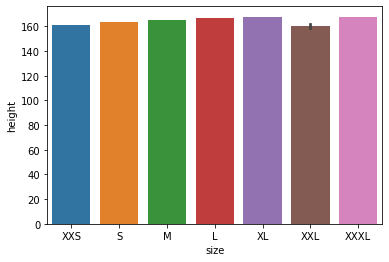

In [184]:
sns.barplot(x='size', y='height', data=clothes_df, order=group_names)

In [216]:
clothes_groupby = clothes_df.groupby('size').agg({'weight':'mean'})
clothes_groupby.sort_values(by='weight',ascending=False)

,weight
size,
XXXL,75.937357
XXL,66.376812
XL,65.576338
L,62.250526
M,58.207694
S,54.105592
XXS,50.545163


<AxesSubplot:xlabel='size', ylabel='weight'>

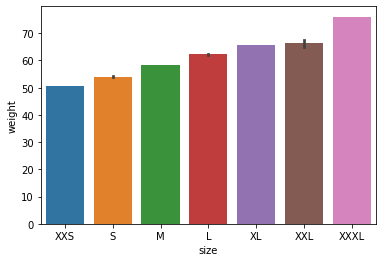

In [185]:
sns.barplot(x='size', y='weight', data=clothes_df, order=group_names)